# Aprendizaje no supervisado en Python

En este caso vamos a estudiar unas aplicaciones simples de algoritmos de clusterización y reducción de dimensionalidad. Este libro de jupyter está basado en clases tomadas de datacamp, en la cual también utilizamos una base de datos de vinos que utilizan en varias de sus clases. 

## Aplicación de clustering utilizando técnica Kmeans

Importamos la librerías necesarias

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing  import StandardScaler
from sklearn.pipeline import make_pipeline

Lectura de datos para pruebas

In [2]:
url = 'https://assets.datacamp.com/production/repositories/655/datasets/2b27d4c4bdd65801a3b5c09442be3cb0beb9eae0/wine.csv'
df = pd.read_csv(url)

In [3]:
df.head()

,class_label,class_name,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1,Barolo,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,Barolo,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,Barolo,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,Barolo,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,Barolo,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.columns

Index(['class_label', 'class_name', 'alcohol', 'malic_acid', 'ash',
       'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids',
       'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue',
       'od280', 'proline'],
      dtype='object')

In [5]:
df['class_name'].unique()

array(['Barolo', 'Grignolino', 'Barbera'], dtype=object)

In [6]:
# Creamos el data set con los valores numericos
df_train = df.iloc[:,2:]
df_train.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
#Convertimos en array el set de entrenamiento
df_train = np.array(df_train)

In [8]:
df_train = np.array(df_train)

In [9]:
# Escalamos los datos y creamos el pipeline para ajustar

# instanciamos scaler
scaler = StandardScaler()

# instanciamos kmeans
kmeans = KMeans(n_clusters = 3) # Por ahora ajustamos con 3 clusters.

# Creamos el pipeline
pipeline = make_pipeline(scaler,kmeans)

# Realizamos el ajuste con los datos
pipeline.fit(df_train)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

In [10]:
# Calculamos los labels
labels = pipeline.predict(df_train)

In [11]:
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

Ahora vamos a probar diferentes k del cluster y a seleccionar el mejor por el metodo del Elbow y el criterio inertia de sklearn

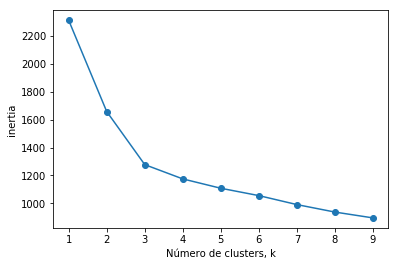

In [12]:
ks = range(1, 10)
inertias = []


# Realizamos las iteraciones
for k in ks:
    model = KMeans(n_clusters= k)
    pipeline = make_pipeline(scaler,model)
    pipeline.fit(df_train)
    inertias.append(model.inertia_) 
    
    
# Graficamos
plt.plot(ks, inertias, '-o')
plt.xlabel('Número de clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

# Con cuantos clusters nos quedamos?

# Con 3, porque a partir de este k, la disminución es menos pronunciada

## Aplicación de clustering utilizando técnica cluster jerarquico


In [13]:
from  scipy.cluster.hierarchy import linkage, dendrogram  # funcion linkage para entrenar y ajustar y dendrogram para graficar

In [14]:
# Otra forma de escalar los datos
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_train)


# Desarrollo del modelo
model = linkage(df_scaled, method='complete')  # metodo complete
model1 = linkage(df_scaled, method='single')  # metodo single

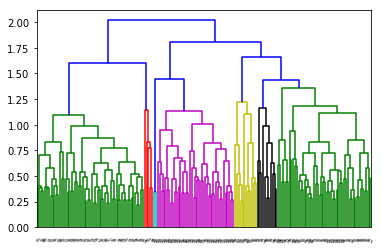

In [15]:
# Plot utiizando model y model1
dendrogram(model,
           labels=None,
           leaf_rotation=150,
           leaf_font_size=3,
)
plt.show()

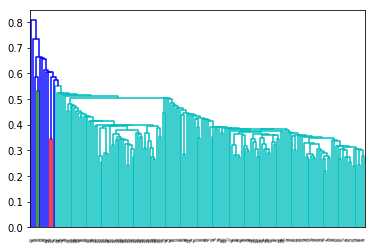

In [16]:
dendrogram(model1,
           labels=None,
           leaf_rotation=150,
           leaf_font_size=3,
)
plt.show()

Ahora vamos a extraer los labels del los modelos, es decir, las etiquetas. Para esto utilizamos la función fcluster 

In [17]:
# Importamos la funcion
from scipy.cluster.hierarchy import fcluster 

# Extracción de etiquetas 
fcluster(model, 1.8,'distance') # # Utilizamos criterio de distancia. ¿Que será el 1.8?
# 1.8 es el umbral a aplicar cuando se forman grupos planos

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [18]:
fcluster(model1, 0.7,'distance') # Utilizamos criterio de distancia. ¿Que será el 0.7?

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

## Aplicacion de TSNE para graficación

Con TSNE podemos realizar la graficación de un dataset de N-Dimensiones a uno de dos dimensiones.

* TSNE

Incrustación de vecinos estocásticos distribuidos en t.

t-SNE [1] es una herramienta para visualizar datos de alta dimensión. Convierte similitudes entre los puntos de datos en probabilidades conjuntas e intenta minimizar la divergencia de Kullback-Leibler entre las probabilidades conjuntas de la incrustación de baja dimensión y los datos de alta dimensión. t-SNE tiene una función de costo que no es convexa, es decir, con diferentes inicializaciones podemos obtener diferentes resultados.

Se recomienda utilizar otro método de reducción de dimensionalidad (por ejemplo, PCA para datos densos o TruncatedSVD para datos dispersos) para reducir el número de dimensiones a una cantidad razonable (por ejemplo, 50) si el número de características es muy alto. Esto suprimirá algo de ruido y acelerará el cálculo de distancias por pares entre muestras. Para obtener más consejos, consulte las preguntas frecuentes de Laurens van der Maaten [2].

Fuente: https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

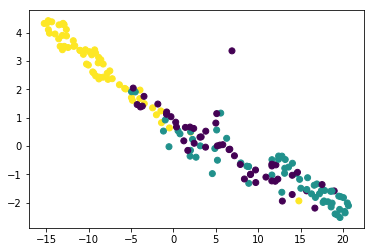

In [29]:
# Importamos TSNE
from sklearn.manifold import TSNE

# Creamos una instancia de TSN con una tasa de aprendizaje
model = TSNE(learning_rate=500) # Probar con diferentes tasas

# Aplicamos transformacion de datos y de una vez ajustamos el modelo
tsne_features = model.fit_transform(df_train)

# Selecccionames la primera columna
x = tsne_features[:,0]

# Selecccionames la segunda columna
y = tsne_features[:,1]

# Graficas mos
plt.scatter(x, y, c=labels)
plt.show()


## Reducción de dimensionalidad utilizando PCA

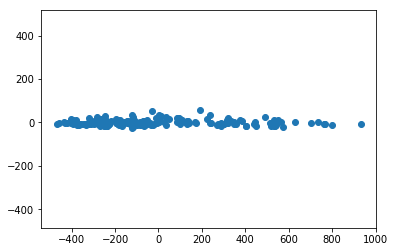

In [30]:
# Importar librerias de PCA
from sklearn.decomposition import PCA 

# Creamos la instancia
model = PCA()

# Ajustamos el modelo con los datos (sobre los datos no escalados)
pca_features = model.fit_transform(df_train) #transform los escala

# Obtenemos la primera columna (maxima variabilidad) del PCA
x = pca_features[:,0]

# Obtenemos la segunda columna (maxima variabilidad) del PCA
y = pca_features[:,1]

# Graficamos
plt.scatter(x, y)
plt.axis('equal')
plt.show()

In [31]:
# Calculamos el coeficiente de pearson para medir correlación de las dos primeras componentes
from scipy.stats import pearsonr
correlation, pvalue = pearsonr(x, y)

# Imprimir la correlación
print(correlation)

0.0


La correlación es 0, por que?. Que sentido tiene?

#### Vamos a analizar la varianza de los componentes principales

¿Con que fin? Vamos a seleccionar los componentes principales del conjunto de datos que logren explicar la mayor variabilidad. Para eso vamos a explorar la varianza graficamente.

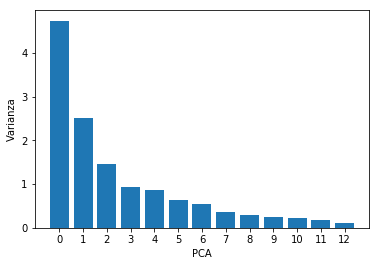

In [32]:
# Instanciamos la funcion para scalar
scaler = StandardScaler()

# Instanciamos funcion PCA
pca = PCA()

# Creamos el pipeline con el scaler y pca
pipeline = make_pipeline(scaler,pca)

# Ajustamos el modelo a los datos sin escalar
pipeline.fit(df_train)

# Realizamos la gráfica
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA')
plt.ylabel('Varianza')
plt.xticks(features)
plt.show()


## Reducción de dimensionalidad utilizando NMF

In [33]:
# Importamos NMF : NO NEGATIVE MATRIX FACTORIZATION
from sklearn.decomposition import NMF 

# Instanciamos funcion NMF
model = NMF(n_components=6) # Probar con diferentes componentes

# Ajustamos el modelo
model.fit(df_train)

# Transformación
nmf_features = model.transform(df_train)

# Imprimir caracteristicas
print(nmf_features)


[[1.02362164e+01 1.56170866e+00 7.65058150e-02 1.54808872e-01
  2.02891143e-01 5.76249445e-02]
 [1.00920477e+01 9.01433976e-01 7.98427637e-04 7.13825913e-02
  1.95015065e-01 1.35136563e-01]
 [1.13895628e+01 5.90504993e-01 2.88325696e-01 1.25332428e-01
  1.73258184e-01 9.14388974e-02]
 ...
 [8.02553071e+00 1.59943610e+00 3.04633908e-01 5.39484907e-01
  0.00000000e+00 2.94142121e-01]
 [8.07358185e+00 1.60507383e+00 3.06145916e-01 4.87330203e-01
  2.34498470e-02 1.83550282e-01]
 [5.38232254e+00 1.31102444e+00 6.00514851e-01 5.42582210e-01
  1.93824435e-02 3.67391132e-01]]
